# Cramer-Rao notebook

In [3]:
sys.path.append("C:/Users/rawlik/nedm/pyfid")

In [4]:
import os

import numpy as np
import matplotlib.pyplot as plt

import pyfid.cramer_rao

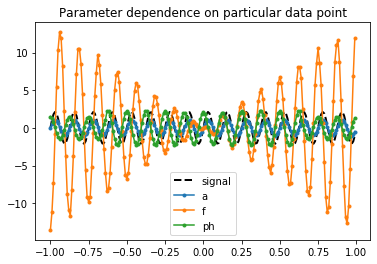

In [6]:
def sig(t, a, f, ph):
    return a * np.sin(2 * np.pi * f * t + ph)

p0 = [2.12, 8, 0]
noise = 0.09

T = np.arange(-1, 1, 0.01)
C = pyfid.cramer_rao.cramer_rao(sig, p0, T, noise,
    show_plot=True, quad_precision=True)

The numerical estimate

In [7]:
C.diagonal()

array([7.75665810e-05, 1.32536722e-06, 2.02803267e-05])

The Monte-Carlo estimate

array([7.75665810e-05, 1.32536722e-06, 2.02803267e-05])

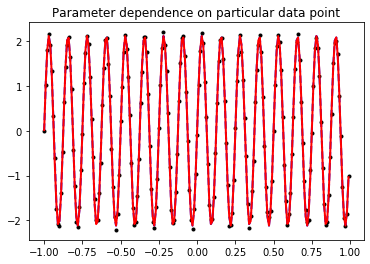

In [8]:
Cmc = pyfid.cramer_rao.cramer_rao_monte_carlo(sig, p0, T, noise,
    show_plot=True)
C.diagonal()

And the theoretical estimate:

In [9]:
# ref: D. Rife, R. Boorstyn "Single-Tone Parameter Estimation from
# Discrete-Time Observations", IEEE Transactions on Information Theory
# 20, 5, 1974

var_a = noise**2 / T.size * 2
var_w = 12 * noise**2 / ( p0[0]**2 * (T[1]-T[0])**2 * \
    (T.size**3 - T.size) ) * 2
var_f = var_w / (2*np.pi)**2
var_ph = noise**2 / p0[0]**2 / T.size * 2

np.array([var_a, var_f, var_ph])

array([8.10000000e-05, 1.36957454e-06, 1.80224279e-05])